# (Ford GoBike Visualizations and Insights)
## by (Abdulrahman Almajhad)

## Investigation Overview

> The presentation shows the relationship between more than one factor, such as who of user type takes less duration trip time compared with the other and why, and which stations that have the most number of trips (start/end).

## Dataset Overview

> Ford GoBike (Bay Wheels previously) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
Our Ford GoBike dataset will be in 2019/12, which contains 150102 rows and 14 columns with attributes such as User types, The Duration trip time, Stations names, and The start/end latitude/longitude.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_GoBike = pd.read_csv('201912-baywheels-tripdata_edited.csv')
df_GoBike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day_of_month,day_of_week,hour_of_day,duration_min
0,3463,2019-12-31 23:41:57.023,2020-01-01 00:39:40.518,104,4th St at 16th St,37.767045,-122.390833,104,4th St at 16th St,37.767045,-122.390833,9617,Customer,31,Tue,23,57.72
1,3446,2019-12-31 23:42:06.912,2020-01-01 00:39:33.903,104,4th St at 16th St,37.767045,-122.390833,104,4th St at 16th St,37.767045,-122.390833,3235,Customer,31,Tue,23,57.43
2,3468,2019-12-31 23:41:45.021,2020-01-01 00:39:33.615,104,4th St at 16th St,37.767045,-122.390833,104,4th St at 16th St,37.767045,-122.390833,976,Customer,31,Tue,23,57.80
3,3412,2019-12-31 23:42:17.854,2020-01-01 00:39:09.973,66,3rd St at Townsend St,37.778742,-122.392741,130,22nd St Caltrain Station,37.757704,-122.391885,11057,Customer,31,Tue,23,56.87
4,3400,2019-12-31 23:42:28.887,2020-01-01 00:39:09.049,66,3rd St at Townsend St,37.778742,-122.392741,130,22nd St Caltrain Station,37.757704,-122.391885,9538,Customer,31,Tue,23,56.67


## What is the station that has the most number of trips?

> The Bar Chart shows the top 10 stations that have the most number of trips (Start-End).

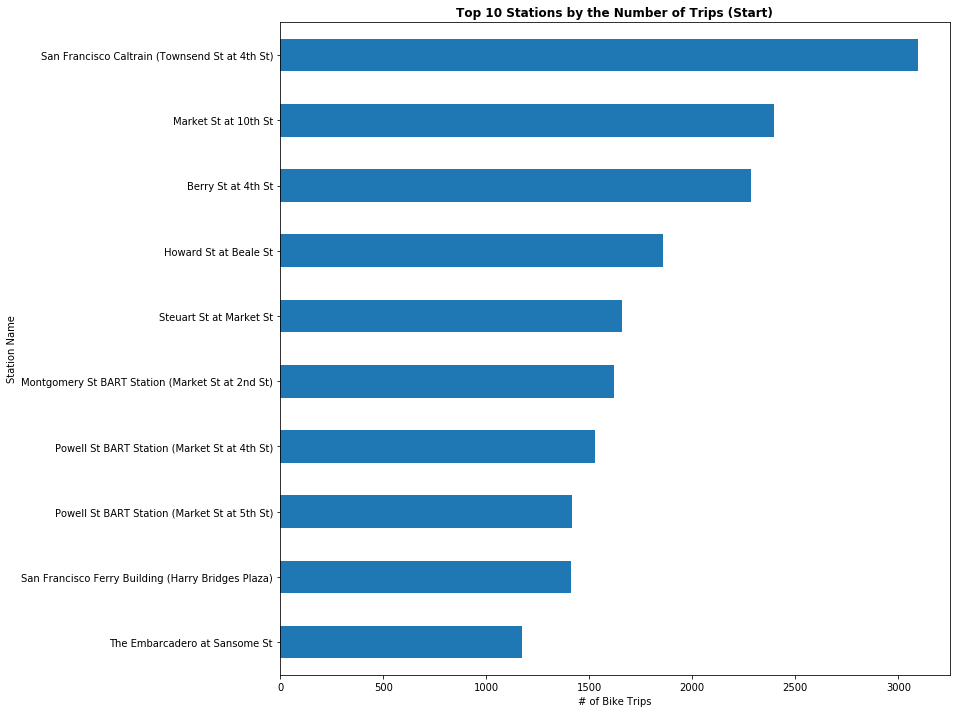

In [3]:
top10_start_stations = df_GoBike['start_station_name'].value_counts().sort_values().tail(10)

plt.figure(figsize=[12, 12])
top10_start_stations.plot(kind = 'barh');
plt.xlabel('# of Bike Trips')
plt.ylabel('Station Name')
plt.title('Top 10 Stations by the Number of Trips (Start)', fontweight = 'bold');

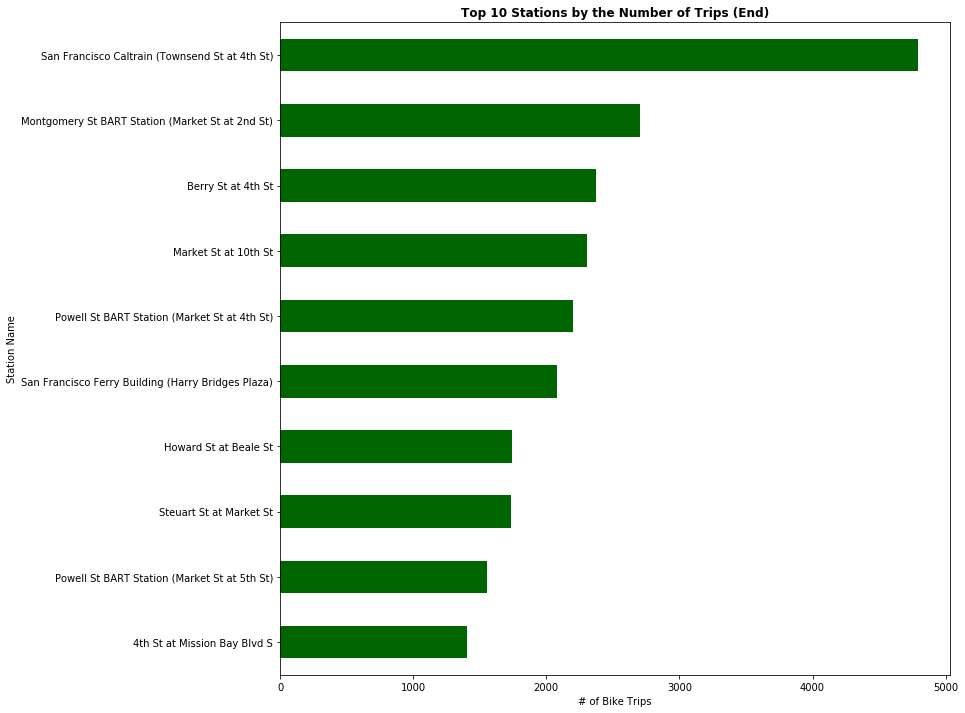

In [4]:
top10_end_stations = df_GoBike['end_station_name'].value_counts().sort_values().tail(10)

plt.figure(figsize=[12, 12])
top10_end_stations.plot(kind = 'barh', color = 'darkgreen');
plt.xlabel('# of Bike Trips')
plt.ylabel('Station Name')
plt.title('Top 10 Stations by the Number of Trips (End)', fontweight = 'bold');

## What are the most User Types?

> The Pie Chart shows what the most user types that we have.

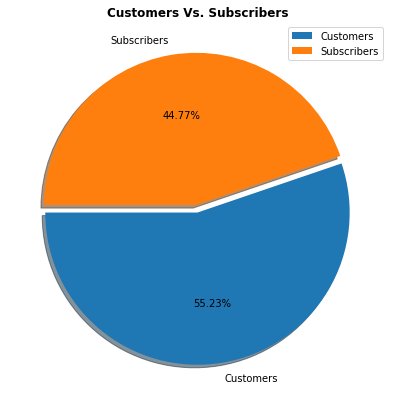

In [5]:
labels = 'Customers', 'Subscribers'
plt.figure(figsize=[7, 7])
plt.pie(df_GoBike['user_type'].value_counts(), explode = (0, 0.05), labels = labels, autopct = '%1.2f%%', shadow = True, startangle = 180)
plt.title('Customers Vs. Subscribers', fontweight = 'bold')
plt.legend();

## When Bike Trips goes active during the hours of the day?

The Violinplot Plot shows when the bike trips are active during the hours of the day.

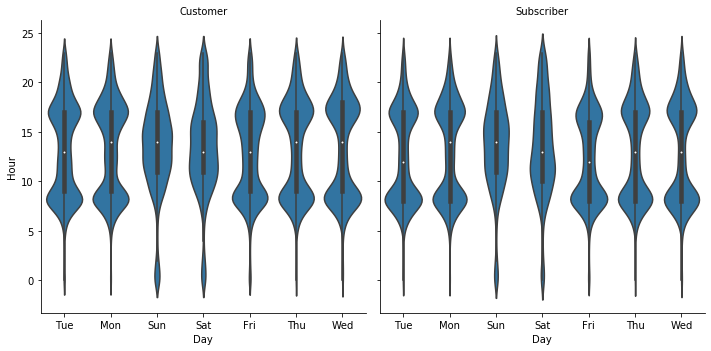

In [6]:
g = sb.FacetGrid(data = df_GoBike, col = 'user_type', size = 5)
g.map(sb.violinplot, 'day_of_week', 'hour_of_day');
g.set_axis_labels("Day", "Hour")
g.set_titles("{col_name}");

## Insights
- **The San Francisco Caltrain station is the most station that bike riders start at (3094 trips).**
- **The San Francisco Caltrain station is the most station that bike riders end at (4791 trips).**
- **The Customers are more than Subscribers. As the number of Customers is 67909 (55.32%) while the number of subscribers is 56498 (44.77%).**
- **The trips are active in the morning periods (7,8,9) and evening periods (16,17) "Usually work start/end times on weekdays" compared to the days of the weekend that indicates a different activity, usually the afternoon period. These notes are the same by subscribers and customers.**

# THANK YOU!

In [ ]:
!jupyter nbconvert communicate-data-findings-slidedeck.ipynb --to slides --post serve --template output_toggle